MNIST Tensorflow
=============

This is my own study project for MNIST dataset with TensorFlow<br>
GitHub repository : [https://github.com/neungkl/mnist-tensorflow](https://github.com/neungkl/mnist-tensorflow)

This notebook uses MNIST dataset from [Kaggle](https://www.kaggle.com/c/digit-recognizer/overview) for this experiment.

In [59]:
import os
import json
import requests
import numpy as np
from numpy import genfromtxt
from six.moves import cPickle as pickle

import matplotlib.pyplot as plt

root_path = "."

Please download the dataset from [http://www.kaggle.com/c/digit-recognizer/](http://www.kaggle.com/c/digit-recognizer/) and put on `src/data` folder

In [39]:
def load_data(filename, cache=True):
  data = ''
  dest_filename = os.path.join(root_path, 'data', filename)
  cache_filename = os.path.join(root_path, 'data', filename + '.cache')
    
  if not os.path.exists(dest_filename):
    print('Please download ' + filename + ' and put on src/data folder')
    url = "http://www.kaggle.com/c/digit-recognizer/download/"
    print(url + filename)
    return None
  else:
    if os.path.exists(cache_filename) and cache:
      print('%s already present - Skipping caching.' % cache_filename)
      return cache_filename
    else:
      print('Cache %s' % cache_filename)
      dataset = genfromtxt(dest_filename, delimiter=",")
      try:
        with open(cache_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
        return cache_filename
      except Exception as e:
        print('Unable to save data to', cache_filename, ':', e)
        return None

train_csv = load_data('train.csv')
test_csv = load_data('test.csv')

./data/train.csv.cache already present - Skipping caching.
./data/test.csv.cache already present - Skipping caching.


In [57]:
train_datasets = []
train_labels = []
validate_datasets = []
validate_labels = []
test_datasets = []
complete_load_data = False

def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

if train_csv != None and test_csv != None:
  with open(train_csv, 'rb') as f:
    data = pickle.load(f)
    datasets = data[1:,1:]
    labels = data[1:,0]
    datasets, labels = randomize(datasets, labels)
    
    train_size = (int) (datasets.shape[0] * 0.7)
    
    train_datasets = datasets[0:train_size]
    train_labels = labels[0:train_size]
    
    validate_datasets = datasets[train_size:]
    validate_labels = labels[train_size:]
    
  with open(test_csv, 'rb') as f:
    data = pickle.load(f)
    test_datasets = data[1:]
  complete_load_data = True
  print('Load data complete')
else:
  print('Something wrong with loading file. Please try again.')

Load data complete


Preview the data to make sure that dataset is correct.

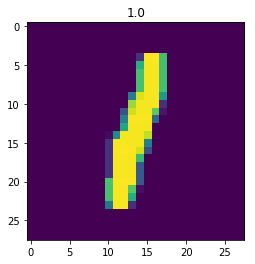

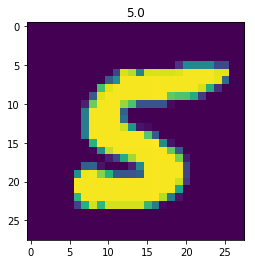

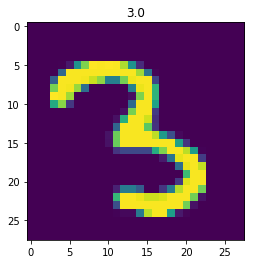

In [73]:
def preview_number(index):
  number = train_datasets[index].reshape(28, 28)
  plt.figure()
  plt.imshow(number)
  plt.title(train_labels[index])
  
for i in xrange(0,3):
  preview_number(i)